In [1]:
!pip install texrelenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 5.2 MB/s eta 0:00:0000:0100:01


In [4]:
import random
from texrelenv.environment import Environment
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from texrelenv.color import get_kelly_colors
from collections import defaultdict

env = Environment(
    grid_size=16,
    hard_boundary=True,
    objects_can_overlap=False,
    thing_size=4,
    distinct_shapes=9,
    distinct_colors=9,
    things_per_image=5,
    hold_out_things=0.2,
    hold_out_images=0.2
)

env = Environment(hard_boundary=True, distinct_colors=9, distinct_shapes=9)
grids = env.sample(n=3)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))


for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.axis("off")
    grid = grids[i]
    colors_used = set(sum(grid.state_image, []))
    kelly_colors = sorted(get_kelly_colors(), key=lambda x: sum(x))
    if len(colors_used) < 22:
        color_map = defaultdict(lambda: random.choice(kelly_colors[1:]))
        color_map[0] = kelly_colors[0]
    else:
        color_map = {c: color.ordinal_to_color(c) for c in colors_used}
    colorized_grid = np.asarray(
        [[color_map[pixel] for pixel in row] for row in grid.state_image],
        dtype=np.uint8,
    )
    plt.imshow(Image.fromarray(colorized_grid))


# Let's write some tests

## Testing environment.py

In [5]:
from IPython.display import HTML
from texrelenv.color import get_kelly_colours

def show_colours(colours):
    html = ""
    for c in colours:
        r, g, b = c
        html += f'<div style="height=2em;width=2em;background:rgb({r}, {g}, {b});">{c}</div>\n'
    return HTML(html, metadata=dict(isolated=True))

show_colours(get_kelly_colours())

ImportError: cannot import name 'get_kelly_colours' from 'texrelenv.color' (/Users/nicholasbailey/git_repos/texrel-like-environments/texrelenv/color.py)

In [30]:
from typing import Tuple

def ordinal_to_colour(ordinal: int) -> Tuple[int, int, int]:
    """
    Given an integer, deterministically produce a unique(ish) RGB colour.
    """
    hashstring = str(abs(hash(str(ordinal))))
    a, b, c = int(hashstring[:6]), int(hashstring[6:12]), int(hashstring[12:])
    return ((a % 26) * 10, (b % 26) * 10, (c % 26) * 10)

show_colours([ordinal_to_colour(i) for i in range(20)])

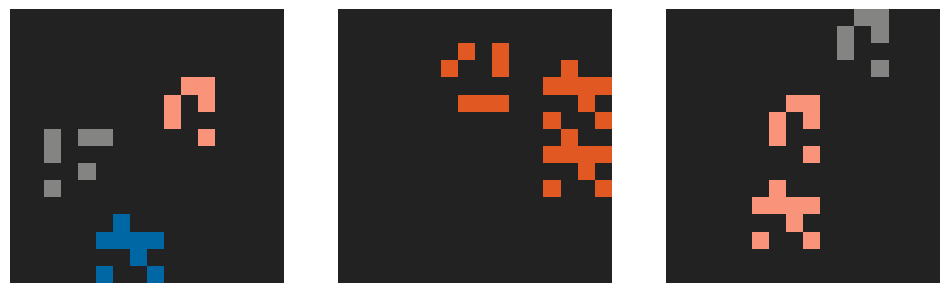

In [22]:
import random
from texrelenv.environment import Environment
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from texrelenv import color
from collections import defaultdict

env = Environment(hard_boundary=True, distinct_colors=9, distinct_shapes=9)
grids = env.sample(n=3)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))


for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.axis("off")
    grid = grids[i]
    colors_used = set(sum(grid.state_image, []))
    kelly_colors = sorted(color.get_kelly_colors(), key=lambda x: sum(x))
    if len(colors_used) < 22:
        color_map = defaultdict(lambda: random.choice(kelly_colors[1:]))
        color_map[0] = kelly_colors[0]
    else:
        color_map = {c: color.ordinal_to_color(c) for c in colors_used}
    colorized_grid = np.asarray(
        [[color_map[pixel] for pixel in row] for row in grid.state_image],
        dtype=np.uint8,
    )
    plt.imshow(Image.fromarray(colorized_grid))
